In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
import sys
sys.version_info
 
import platform
platform.platform()
 
import pkg_resources
dists = [d for d in pkg_resources.working_set]
dists

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


[zipp 3.1.0 (/usr/local/lib/python3.6/dist-packages),
 zict 2.0.0 (/usr/local/lib/python3.6/dist-packages),
 yellowbrick 0.9.1 (/usr/local/lib/python3.6/dist-packages),
 xlwt 1.3.0 (/usr/local/lib/python3.6/dist-packages),
 xlrd 1.1.0 (/usr/local/lib/python3.6/dist-packages),
 xgboost 0.90 (/usr/local/lib/python3.6/dist-packages),
 xarray 0.15.1 (/usr/local/lib/python3.6/dist-packages),
 wrapt 1.12.1 (/usr/local/lib/python3.6/dist-packages),
 wordcloud 1.5.0 (/usr/local/lib/python3.6/dist-packages),
 widgetsnbextension 3.5.1 (/usr/local/lib/python3.6/dist-packages),
 wheel 0.34.2 (/usr/local/lib/python3.6/dist-packages),
 Werkzeug 1.0.1 (/usr/local/lib/python3.6/dist-packages),
 webencodings 0.5.1 (/usr/local/lib/python3.6/dist-packages),
 wcwidth 0.2.5 (/usr/local/lib/python3.6/dist-packages),
 wasabi 0.7.1 (/usr/local/lib/python3.6/dist-packages),
 vega-datasets 0.8.0 (/usr/local/lib/python3.6/dist-packages),
 urllib3 1.24.3 (/usr/local/lib/python3.6/dist-packages),
 uritemplate 3.0.

In [ ]:
dataset1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/201901-202003.csv')
data = pd.DataFrame(dataset1)

In [ ]:
dataset2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/202004.csv')
data1 = pd.DataFrame(dataset2)

In [ ]:
data.head(10)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
5,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
8,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20
9,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40


In [ ]:
data1.head(10)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,3,779600,4
1,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,14,2427700,15
2,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,18,2184600,18
3,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3653100,23
4,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,15,2765500,18
5,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,22,6754600,24
6,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,70s,1,5,5,675000,5
7,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,70s,2,5,9,1011000,9
8,202004,강원,강릉시,골프장 운영업,강원,강릉시,30s,1,2,16,1966600,19
9,202004,강원,강릉시,골프장 운영업,강원,강릉시,40s,1,3,37,8016500,62


In [ ]:
'''
월별 전체 총합 데이터 (Top Level)
'''
 
data_sum = data.groupby('REG_YYMM')['AMT'].sum().reset_index()
data_sum

,REG_YYMM,AMT
0,201901,4052317259025
1,201902,3634345832156
2,201903,4105409759731
3,201904,4006698507386
4,201905,4345471235813
5,201906,4122105394194
6,201907,4187299694709
7,201908,4268655968810
8,201909,4123348058794
9,201910,4176583723584


In [ ]:
data_ex = data_sum.copy()

In [ ]:
'''
4월 전체 총합 데이터 (Top Level)
'''
 
data_sum1 = data1.groupby('REG_YYMM')['AMT'].sum().reset_index()
data_sum1

,REG_YYMM,AMT
0,202004,3542539370072


In [ ]:
'''
year

instead put numbering

month : to express cyclic
'''

'\nyear\n\ninstead put numbering\n\nmonth : to express cyclic\n'

In [ ]:
data_ex.insert(1, 'index',0)
data_ex.insert(2, 'year',0)
data_ex.insert(3, 'month',0)

In [ ]:
for i in range(0,len(data_ex)):
    data_ex['index'][i] = i+1

In [ ]:
data_ex['year'] = [1 if i > 12 else 0 for i in data_ex['index']]

In [ ]:
for i in range(0,len(data_ex)):
    data_ex['month'][i] = int(str(data_ex['REG_YYMM'][i])[4:6])

In [ ]:
data_ex.drop('REG_YYMM', axis=1, inplace=True)

In [ ]:
data_ex

,index,year,month,AMT
0,1,0,1,4052317259025
1,2,0,2,3634345832156
2,3,0,3,4105409759731
3,4,0,4,4006698507386
4,5,0,5,4345471235813
5,6,0,6,4122105394194
6,7,0,7,4187299694709
7,8,0,8,4268655968810
8,9,0,9,4123348058794
9,10,0,10,4176583723584


In [ ]:
data_sum1.insert(1, 'index',0)
data_sum1.insert(2, 'year',0)
data_sum1.insert(3, 'month',0)
data_sum1['index']= 16
data_sum1['year'] = 1
data_sum1['month'] = 4
data_sum1.drop('REG_YYMM', axis=1, inplace=True)
data_sum1

,index,year,month,AMT
0,16,1,4,3542539370072


In [ ]:
'''
lag
lag를 변수로 추가하여 regression 문제로 변환
https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a

예제에선 두개를 활용하여 차이까지 넣어서 적합시키고 있으나 관측치가 너무 적음

19년 1월 같은 경우에는 19년 평균을 lag로 넣어서 임시로 보정해줄 것.

중간값이나 이런 다른 걸로 보정해도 될듯

1월 보다 낮은 숫자를 넣는게 그래프 상 좋아보이긴 함

'''

'\nlag\nlag를 변수로 추가하여 regression 문제로 변환\nhttps://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a\n\n예제에선 두개를 활용하여 차이까지 넣어서 적합시키고 있으나 관측치가 너무 적음\n\n19년 1월 같은 경우에는 19년 평균을 lag로 넣어서 임시로 보정해줄 것.\n\n중간값이나 이런 다른 걸로 보정해도 될듯\n\n1월 보다 낮은 숫자를 넣는게 그래프 상 좋아보이긴 함\n\n'

In [ ]:
data_ex.insert(3, 'lag', 0)

In [ ]:
for i in range(1,len(data_ex['lag'])):
    data_ex['lag'][i] = data_ex['AMT'][i-1]

In [ ]:
mean = sum(data_ex['AMT'][:12]) / len(data_ex['AMT'][:12])
data_ex['lag'][0] = mean

In [ ]:
data_ex

,index,year,month,lag,AMT
0,1,0,1,4113542255379,4052317259025
1,2,0,2,4052317259025,3634345832156
2,3,0,3,3634345832156,4105409759731
3,4,0,4,4105409759731,4006698507386
4,5,0,5,4006698507386,4345471235813
5,6,0,6,4345471235813,4122105394194
6,7,0,7,4122105394194,4187299694709
7,8,0,8,4187299694709,4268655968810
8,9,0,9,4268655968810,4123348058794
9,10,0,10,4123348058794,4176583723584


In [ ]:
data_sum1.insert(3, 'lag', 0)
data_sum1['lag'] = data_sum['AMT'][14]
data_sum1

,index,year,month,lag,AMT
0,16,1,4,3437884426097,3542539370072


In [ ]:
data_lag = pd.concat([data_ex, data_sum1])
data_lag.reset_index(drop=True, inplace=True)
data_lag

,index,year,month,lag,AMT
0,1,0,1,4113542255379,4052317259025
1,2,0,2,4052317259025,3634345832156
2,3,0,3,3634345832156,4105409759731
3,4,0,4,4105409759731,4006698507386
4,5,0,5,4006698507386,4345471235813
5,6,0,6,4345471235813,4122105394194
6,7,0,7,4122105394194,4187299694709
7,8,0,8,4187299694709,4268655968810
8,9,0,9,4268655968810,4123348058794
9,10,0,10,4123348058794,4176583723584


In [ ]:
'''
dummy!
data_ex --> data_lag
'''

'\ndummy!\ndata_ex --> data_lag\n'

In [ ]:
data_temp = data_lag.copy()
data_temp

,index,year,month,lag,AMT
0,1,0,1,4113542255379,4052317259025
1,2,0,2,4052317259025,3634345832156
2,3,0,3,3634345832156,4105409759731
3,4,0,4,4105409759731,4006698507386
4,5,0,5,4006698507386,4345471235813
5,6,0,6,4345471235813,4122105394194
6,7,0,7,4122105394194,4187299694709
7,8,0,8,4187299694709,4268655968810
8,9,0,9,4268655968810,4123348058794
9,10,0,10,4123348058794,4176583723584


In [ ]:
data_lag

,index,year,month,lag,AMT
0,1,0,1,4113542255379,4052317259025
1,2,0,2,4052317259025,3634345832156
2,3,0,3,3634345832156,4105409759731
3,4,0,4,4105409759731,4006698507386
4,5,0,5,4006698507386,4345471235813
5,6,0,6,4345471235813,4122105394194
6,7,0,7,4122105394194,4187299694709
7,8,0,8,4187299694709,4268655968810
8,9,0,9,4268655968810,4123348058794
9,10,0,10,4123348058794,4176583723584


In [ ]:
data_temp = data_lag.copy()
year = pd.get_dummies(data_lag['year'])
year = year.rename(columns={0:19,1:20})
month = pd.get_dummies(data_temp['month'])
data_lag = pd.concat([data_temp['index'],year, month,data_temp['lag'],data_temp['AMT']],axis = 1)

In [ ]:
data_lag

,index,19,20,1,2,3,4,5,6,7,8,9,10,11,12,lag,AMT
0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4113542255379,4052317259025
1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4052317259025,3634345832156
2,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,3634345832156,4105409759731
3,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,4105409759731,4006698507386
4,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4006698507386,4345471235813
5,6,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4345471235813,4122105394194
6,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4122105394194,4187299694709
7,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4187299694709,4268655968810
8,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4268655968810,4123348058794
9,10,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4123348058794,4176583723584


In [ ]:
'''
data_ex --> data_lag
data_nav --> data_nav
'''

'\ndata_ex --> data_lag\ndata_nav --> data_nav\n'

In [ ]:
data_train = data_lag.copy()
data_train = data_train[:-1]
data_test = data_lag.iloc[-1]
data_test

index               16
19                   0
20                   1
1                    0
2                    0
3                    0
4                    1
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
12                   0
lag      3437884426097
AMT      3542539370072
Name: 15, dtype: int64

In [ ]:
test_input = data_test.iloc[:-2]
test_input_lag = np.log1p(data_test.iloc[-2])
test_input['lag'] = test_input_lag
test_input = np.array([test_input])

test_output = np.log1p([data_test.iloc[-1]])
print(test_input)
print(test_output)

[[16.          0.          1.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.         28.86587741]]
[28.89586492]


In [ ]:
'''
Top Level Prediction
'''

'\nTop Level Prediction\n'

In [ ]:
'''
Random Forrest
'''

'\nRandom Forrest\n'

In [ ]:
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
X_features = data_train.iloc[:,:-2]

X_labels = np.array(data_train.iloc[:, -2])
X_labels = np.log1p(X_labels)[:]
X_labels = pd.DataFrame(X_labels)

temp_pd = pd.concat([X_features,X_labels], axis = 1)
temp_pd = temp_pd.rename(columns={0:'lag'})
X_feature = np.array(temp_pd)

y_labels = np.array(data_train.iloc[:, -1])
 
X_train, y_train = X_feature[:-1, :], np.log1p(y_labels)[:-1]
X_test, y_test = X_feature[-1:, :], np.log1p(y_labels)[-1:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
test_pred = regressor.predict(test_input)

In [ ]:
from sklearn import metrics
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 
pred = np.expm1(y_pred)

Mean Absolute Error: 0.1362039606668901
Mean Squared Error: 0.01855151890134775
Root Mean Squared Error: 0.1362039606668901


In [ ]:
 print('Mean Absolute Error:', metrics.mean_absolute_error(test_output, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_output, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_output, test_pred)))
 
pred = np.expm1(test_pred)

Mean Absolute Error: 0.09782881834869173
Mean Squared Error: 0.009570477699501322
Root Mean Squared Error: 0.09782881834869173


In [ ]:
true_graph = np.concatenate((y_train, y_test, test_output))

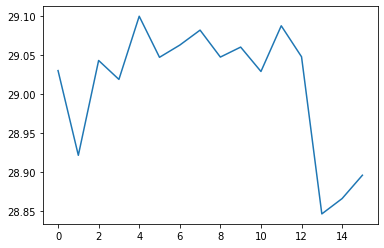

In [ ]:
import matplotlib.pyplot as plt
plt.plot(true_graph)

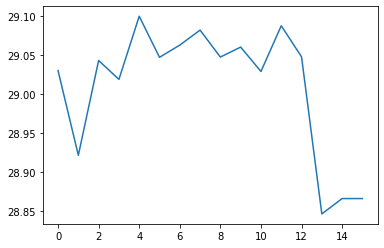

In [ ]:
import matplotlib.pyplot as plt
without = np.concatenate((y_train, y_test))
plt.plot(without)

In [ ]:
april = np.array([[16,0,1,0,0,0,1,0,0,0,0,0,0,0,0]]) 
may = np.array([[17,0,1,0,0,0,0,1,0,0,0,0,0,0,0]])
june = np.array([[18,0,1,0,0,0,0,0,1,0,0,0,0,0,0]])
july = np.array([[19,0,1,0,0,0,0,0,0,1,0,0,0,0,0]])

In [ ]:
april = np.concatenate((april,np.array([test_pred])), axis = 1)
april_pred = regressor.predict(april)
may = np.concatenate((may,np.array([april_pred])), axis = 1)
may_pred = regressor.predict(may)
june = np.concatenate((june,np.array([may_pred])), axis = 1)
june_pred = regressor.predict(june)
july = np.concatenate((july,np.array([june_pred])), axis = 1)
july_pred = regressor.predict(july)

In [ ]:
april

array([[16.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        28.99369374]])

In [ ]:
may

array([[17.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        28.99369374]])

In [ ]:
june

array([[18.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        29.01792732]])

In [ ]:
july

array([[19.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        28.99928403]])

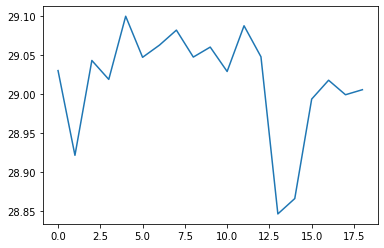

In [ ]:
import matplotlib.pyplot as plt
without = np.concatenate((y_train, y_test, april_pred, may_pred, june_pred, july_pred))
plt.plot(without)